# Linear Regression - Example
Scikit-learn is a free machine learning library for python. We can easily implement linear regression with Scikit-learn using the LinearRegression class. 
After creating a linear regression object, we can obtain the line that best fits our data by calling the fit method.
However, first we will learn how to implement a simple linear regression from scratch using two different approaches: 
- OLS
- Gradient Descent

You will see this is funnier and more effective to learn a model!

In [2]:
# Libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the weight and height dataset
You can find the dataset in the following [link](https://www.kaggle.com/datasets/mustafaali96/weight-height/data).

In [3]:
# read the csv file
df_height = pd.read_csv('Files/weight-height.csv')
df = df_height

# EXPLORING THE DATA 
First things first. Before rushing into crafting our perfect model, we need to understand our data. 
Some basic exploration is always the best way to start. 

In [4]:
# print the first 5 rows of the data set
df_height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
# shape of the dataframe
df.shape

# data type of each column
df.dtypes

# number of null values
df.info()

# number of unique values of column Gender
df.Gender.nunique()

# unique values of column Gender
df.Gender.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


array(['Male', 'Female'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


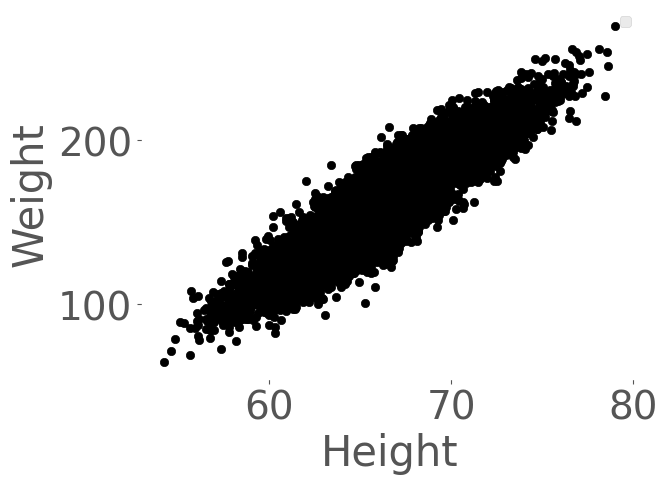

In [6]:
# We observe the tendency that our two variables present with a scatter plot. 
plt.style.use('ggplot')
df = df_height

plt.scatter(df["Height"].values, df["Weight"].values,color="k")
plt.xlabel("Height",fontsize=30)
plt.ylabel("Weight",fontsize=30)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.legend()
plt.show()


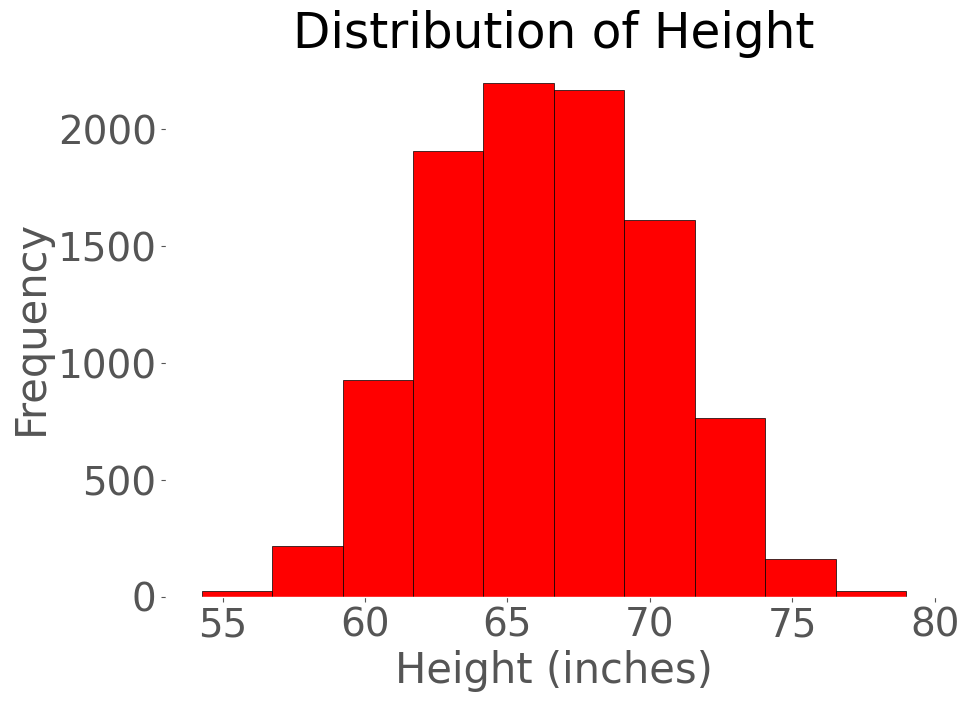

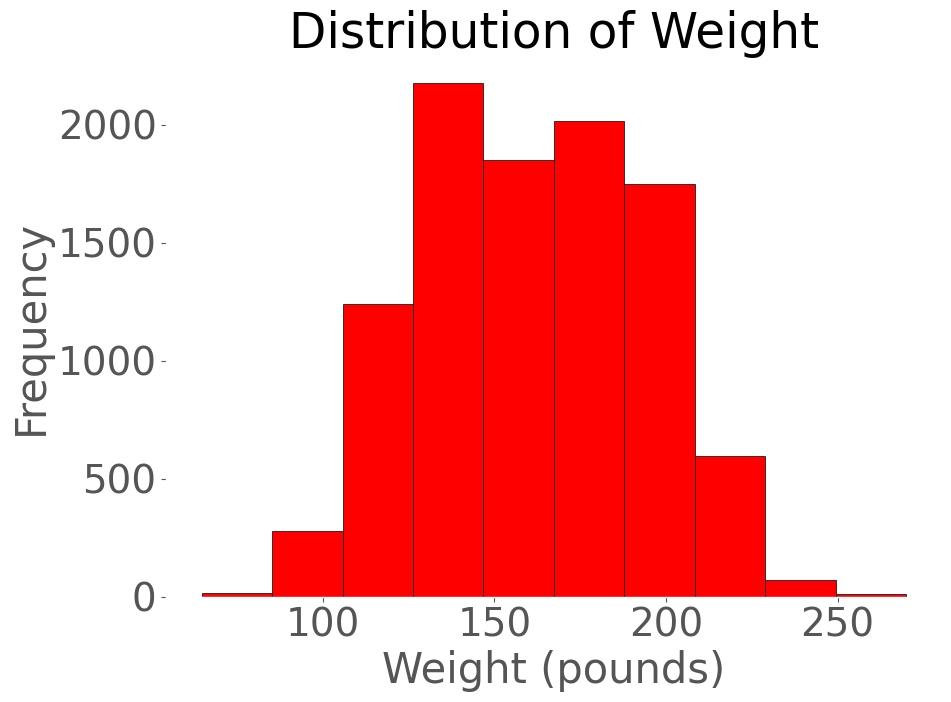

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [7]:
# We check the distribution of both variables. 
plt.style.use('ggplot')
df = df_height


# histogram of the height
df.Height.plot(kind='hist', color='red', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Height', size=35)
plt.xlabel('Height (inches)', size=30)
plt.ylabel('Frequency', size=30)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.show()

plt.figure(figsize=(10, 5))


# histogram of the weight
df.Weight.plot(kind='hist', color='red', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Weight', size=35)
plt.xlabel('Weight (pounds)', size=30)
plt.ylabel('Frequency', size=30);
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.show()
plt.figure(figsize=(10, 5))


# OLS

Now we will start with OLS. 
Picture a dart game, but with data points as targets. Our mission? Get as close to these points as possible, minimizing errors for the best fit! 

With OLS we aim to find the values of A and B that minimize the sum of the squared residuals (S).  
To do so, we can easily take its partial derivatives and set them to zero. Solving these two equations is how we obtain a closed mathematical solution.

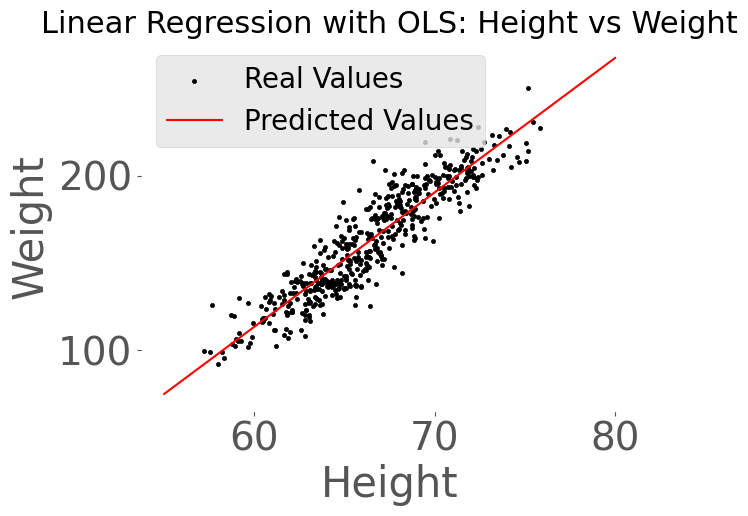

In [8]:
import numpy as np
df = df_height

#df = df[df["Gender"] == "Male"]
df = df.sample(500, replace=False)  # Replace 'n' with the number of rows you want

# Real Values
x = df["Height"].values
y = df["Weight"].values

# mean of our inputs and outputs
x_mean = np.mean(x)
y_mean = np.mean(y)
#total number of values
N = len(x)
# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(N):
    numerator += (x[i] - x_mean) * (y[i] - y_mean)
    denominator += (x[i] - x_mean) ** 2
    
A = numerator / denominator
B = y_mean - (A * x_mean)

#printing the coefficient
#print("Simple linear regression OLS:",A, B)

# Predict and plot
x_values = np.linspace(55, 80, 100)
y_predicted = A * x_values + B

x =  df["Height"].values
y =  df["Weight"].values

plt.title("Linear Regression with OLS: Height vs Weight", fontsize=22)
plt.scatter(x, y, marker='.', label="Real Values", color="k")
plt.plot(x_values, y_predicted, "r", label="Predicted Values")
plt.xlabel("Height",fontsize=30)
plt.ylabel("Weight",fontsize=30)
plt.gca().set_facecolor('white')

# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.legend(fontsize=20)
plt.show()

# Gradient DESCENT
Gradient Descent is like finding a valley's lowest point on a hike! 

Final slope (A): 7.507369930256072
Final intercept (B): -336.32425973454815


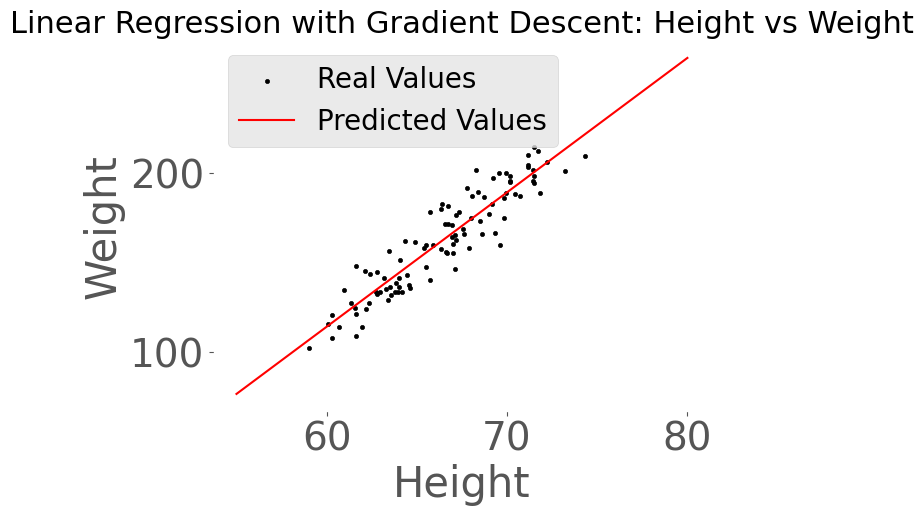

In [9]:
import numpy as np
df = df_height

#df = df[df["Gender"] == "Male"]
df = df.sample(100, replace=False)  # Replace 'n' with the number of rows you want

# Real Values
x = df["Height"].values
y = df["Weight"].values
N = len(x)

# Predict and plot
x_values = np.linspace(55, 80, 1000)

# Function to compute Mean Squared Error
def compute_mse(y_true, y_pred):
    N = len(y_true)
    return np.mean((y_true - y_pred) ** 2)/N

# Function to update m and b using gradient descent
def gradient_descent(x, y, A, B, learning_rate):
    N = len(x)
    y_pred = A * x + B
    dA = -2 * np.sum(x * (y - y_pred)) / N
    dB = -2 * np.sum(y - y_pred) / N
    A -= learning_rate * dA
    B -= learning_rate * dB
    return A, B

# Initialize parameters
A = 0
B = 0
learning_rate = 0.0001
iterations = 10000000

# Gradient Descent
for i in range(iterations):
    A, B = gradient_descent(x, y, A, B, learning_rate)

    #if i % 100 == 0:  # Print MSE every 100 iterations
        #print(f"Iteration {i}: MSE = {compute_mse(y, A*x + B)}")

# Final parameters
print("Final slope (A):", A)
print("Final intercept (B):", B)

# Predict and plot
x_values = np.linspace(55, 80, 100)
y_predicted = A * x_values + B

x_male =  df[df["Gender"] == "Male"]["Height"].values
y_male =  df[df["Gender"] == "Male"]["Weight"].values

x_female =  df[df["Gender"] == "Female"]["Height"].values
y_female =  df[df["Gender"] == "Female"]["Weight"].values

plt.title("Linear Regression with Gradient Descent: Height vs Weight", fontsize=22)
plt.scatter(x, y, marker='.', label="Real Values", color="k")
plt.plot(x_values, y_predicted, "r", label="Predicted Values")
plt.xlabel("Height",fontsize=30)
plt.ylabel("Weight",fontsize=30)
plt.gca().set_facecolor('white')

# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.legend(fontsize=20)
plt.show()


# SK-LEARN

-350.737191812137
[7.71728764]


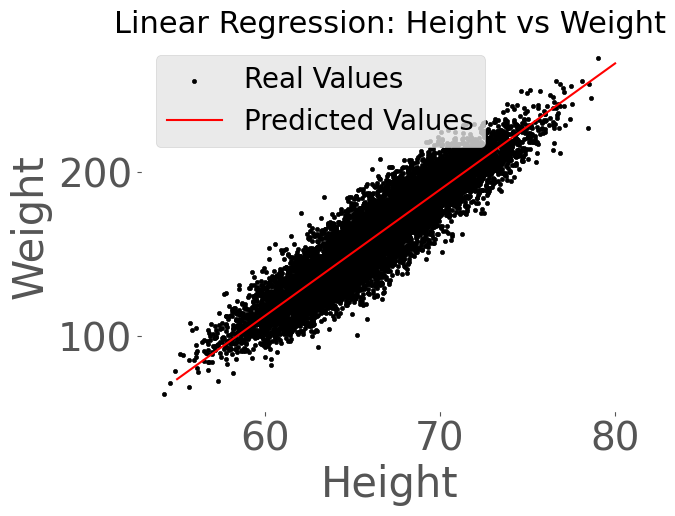

In [10]:
from sklearn.linear_model import LinearRegression

df = df_height


# create linear regression object
lr = LinearRegression()

# fit linear regression
lr.fit(df[['Height']], df['Weight'])

x_values = np.linspace(55,80,100)
y_predicted = lr.coef_*x_values + lr.intercept_

# get the slope and intercept of the line best fit
print(lr.intercept_)

print(lr.coef_)

# Real Values
x = df["Height"].values
y = df["Weight"].values

plt.title("Linear Regression: Height vs Weight", fontsize=22)
plt.scatter(x, y, marker='.', label="Real Values", color="k")
#plt.scatter(x_female, y_female, marker='.', label="Real Values - Female")
plt.plot(x_values, y_predicted, "r", label="Predicted Values")
plt.xlabel("Height",fontsize=30)
plt.ylabel("Weight",fontsize=30)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.legend(fontsize=20)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


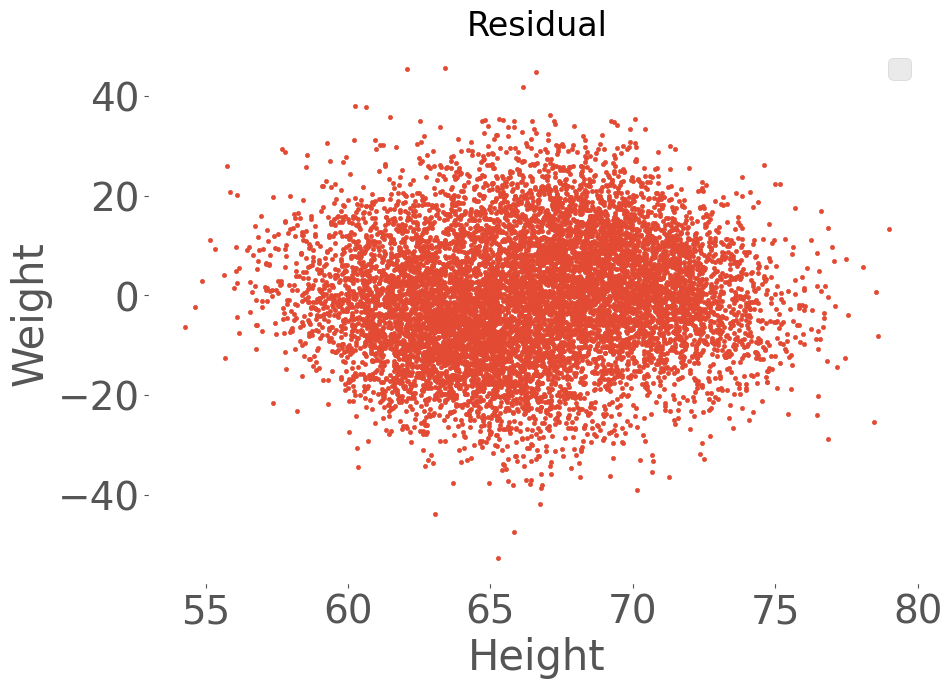

In [11]:
df["Weight"].values - (A*x + B)

# residual plot 500 females
fig = plt.figure(figsize = (10, 7))
plt.title('Residual', size=24)
plt.scatter(df["Height"].values, df["Weight"].values - (A*x + B), marker=".")
plt.xlabel("Height",fontsize=30)
plt.ylabel("Weight",fontsize=30)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.legend(fontsize=20)
plt.show()


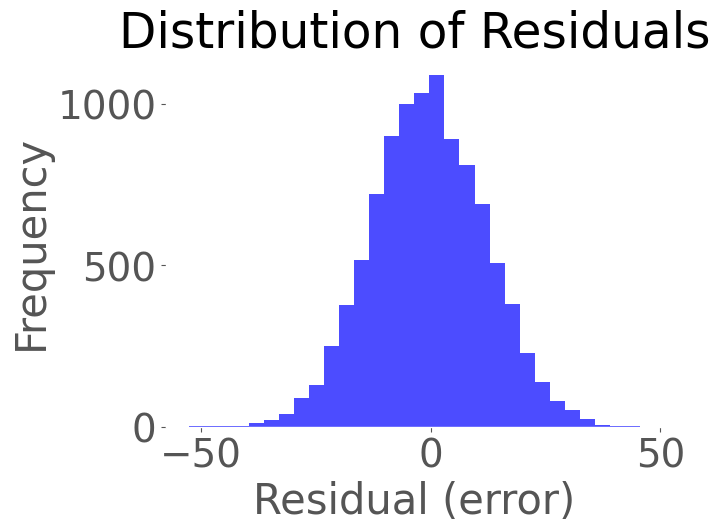

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [12]:
plt.hist(df["Weight"].values - (A*x + B), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Residuals', size=35)
plt.xlabel('Residual (error)', size=30)
plt.ylabel('Frequency', size=30)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.show()

plt.figure(figsize=(10, 5))


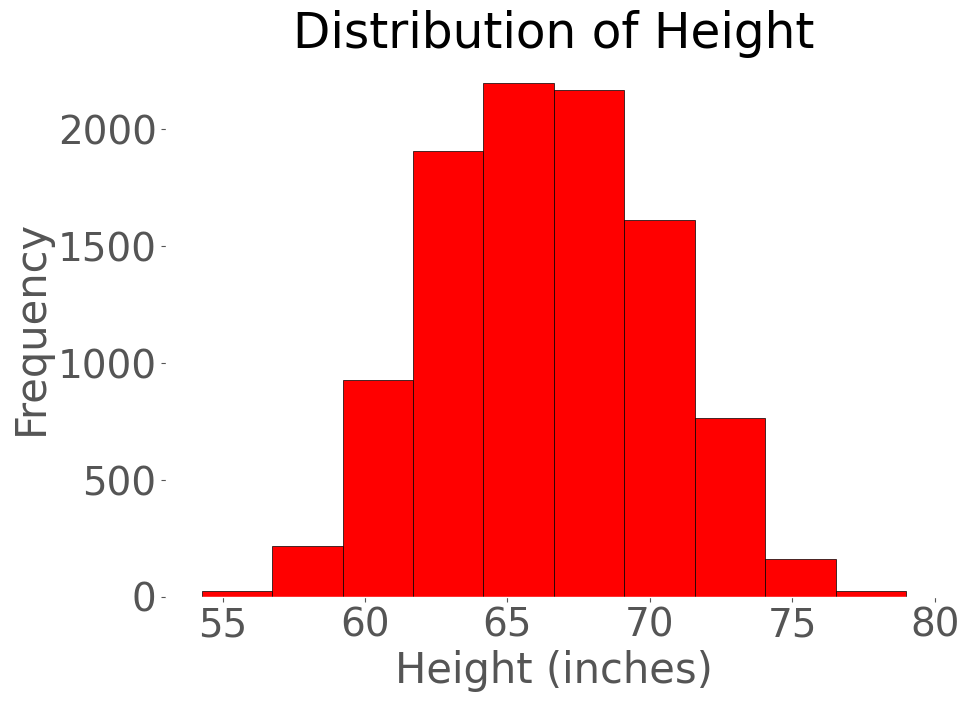

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [13]:
plt.style.use('ggplot')
df = df_height


# histogram of the residuals
df.Height.plot(kind='hist', color='red', edgecolor='black', figsize=(10,7))

plt.title('Distribution of Height', size=35)
plt.xlabel('Height (inches)', size=30)
plt.ylabel('Frequency', size=30)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.show()

plt.figure(figsize=(10, 5))



# Multiple Linear Regression
Previously, we have calculated a single linear model. However, we know gender plays a crucial role on it as well. 

This is why we can calculate two different models: one for men and another for women and thus, predict the weight based on the height of a person and its gender.

## Observing the additional variable

In [14]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

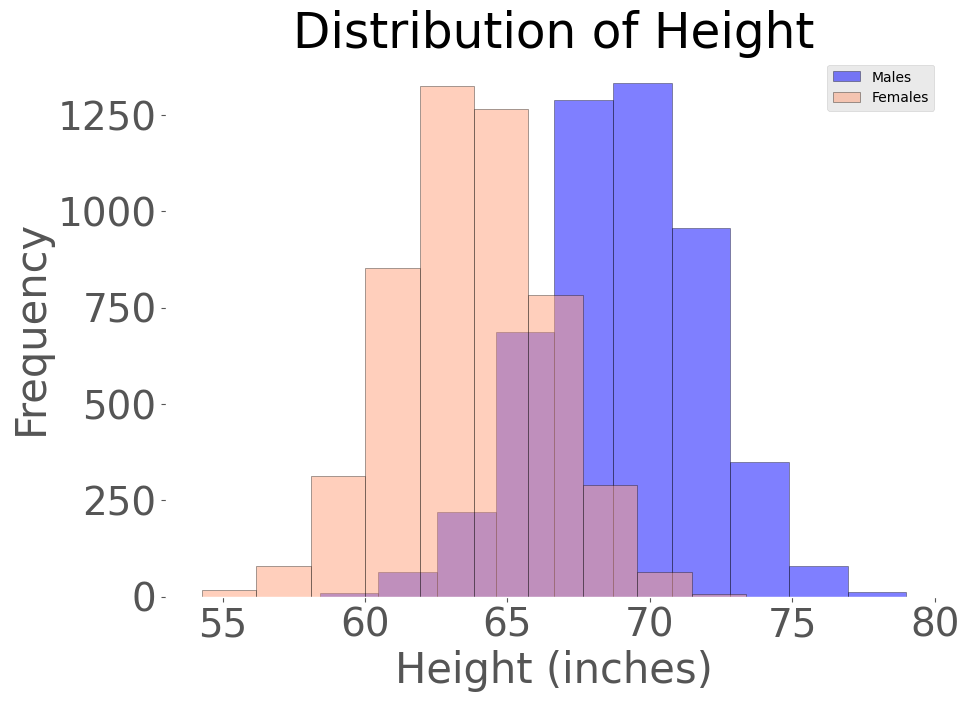

In [15]:
df_male.Height.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df_female.Height.plot(kind='hist', color='lightsalmon', edgecolor='black', alpha=0.5, figsize=(10, 7))

plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=35)
plt.xlabel('Height (inches)', size=30)
plt.ylabel('Frequency', size=30)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.show()



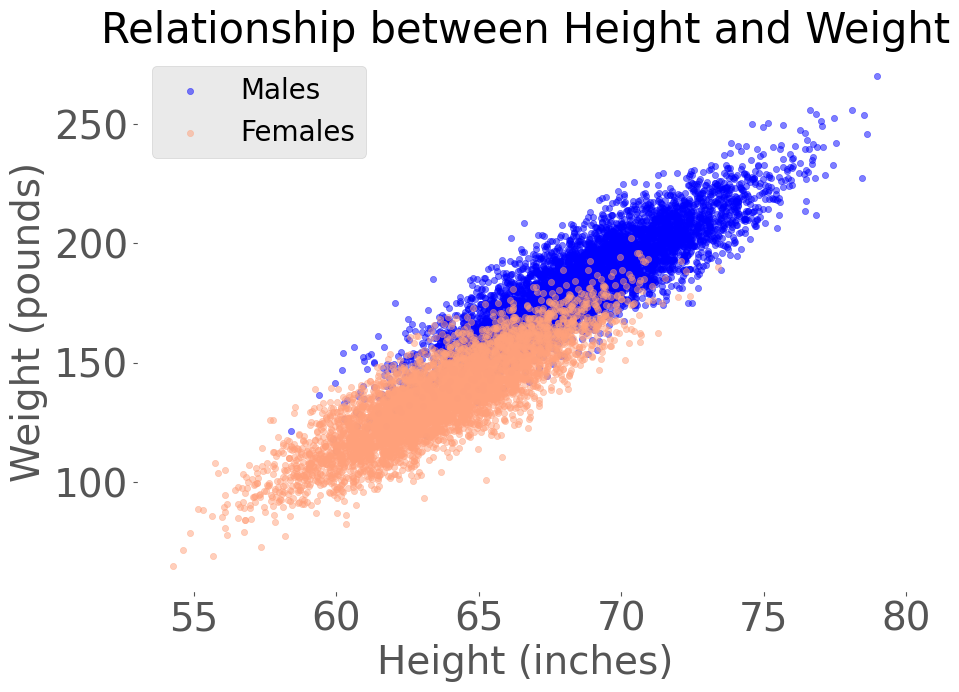

In [16]:
# Scatter plot of Height and Weight

ax1 = df_male.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df_female.plot(kind='scatter', x='Height', y='Weight', color='lightsalmon', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'],fontsize=20)
plt.title('Relationship between Height and Weight', size=30)
plt.xlabel('Height (inches)', size=28)
plt.ylabel('Weight (pounds)', size=28)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.show()

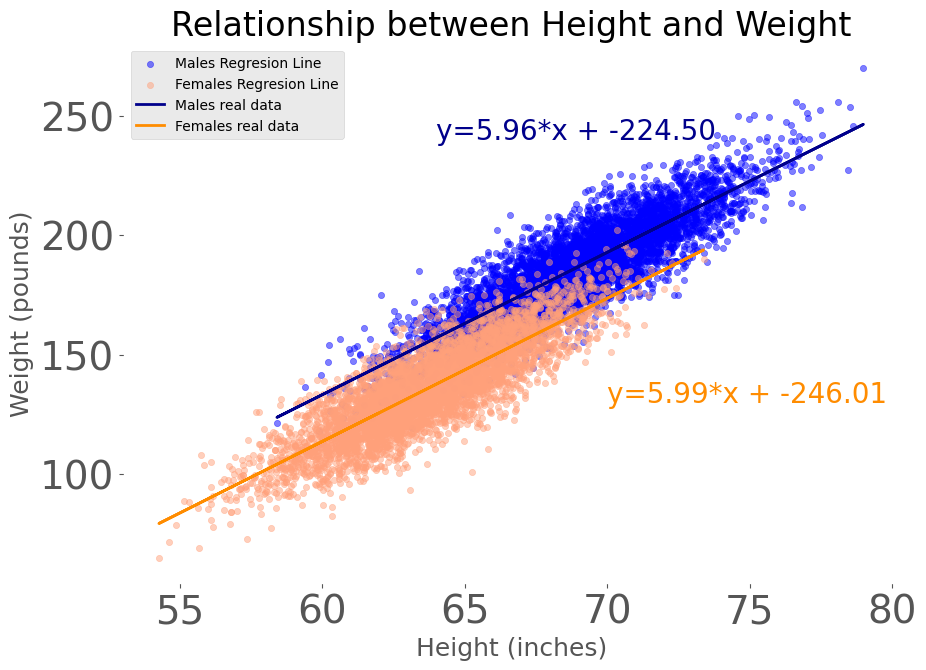

In [28]:
import numpy as np

# polynomial - males
male_fit = np.polyfit(df_male.Height, df_male.Weight, 1)
# array([   5.96177381, -224.49884071])

# polynomial - females
female_fit = np.polyfit(df_female.Height, df_female.Weight, 1)
# array([   5.99404661, -246.01326575])

# Scatter plots.
ax1 = df_male.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df_female.plot(kind='scatter', x='Height', y='Weight', color='lightsalmon', alpha=0.5, figsize=(10, 7), ax=ax1)

# regression lines
plt.plot(df_male.Height, male_fit[0] * df_male.Height + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_female.Height, female_fit[0] * df_female.Height + female_fit[1], color='darkorange', linewidth=2)

# regression equations

plt.text(64, 240, 'y={:.2f}*x + {:.2f}'.format( male_fit[0], male_fit[1]),color='darkblue', size=20)
plt.text(70, 130, 'y={:.2f}*x + {:.2f}'.format(female_fit[0], female_fit[1]), color='darkorange', size=20)

# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males real data', 'Females real data'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.show()

*Males → Weight = -224.50+5.96·Height*

*Females → Weight = -246.01+5.99·Height*

## MULTIPLE VARIABLE LINEAR REGRESSION - ADDING GENDER TO THE EQUATION

In [18]:
df_multiple = pd.get_dummies(df, dtype=int)
df_multiple

,Height,Weight,Gender_Female,Gender_Male
0,73.847017,241.893563,0,1
1,68.781904,162.310473,0,1
2,74.110105,212.740856,0,1
3,71.730978,220.042470,0,1
4,69.881796,206.349801,0,1
...,...,...,...,...
9995,66.172652,136.777454,1,0
9996,67.067155,170.867906,1,0
9997,63.867992,128.475319,1,0
9998,69.034243,163.852461,1,0


In [19]:
# We get a boolean for each category of Gender -> Gender Male and Female
df_multiple = pd.get_dummies(df, dtype=int)

# We drop the Gender Male column and just keep the Gender Female
df_multiple.drop("Gender_Male", axis=1, inplace=True)

# We rename the resting Gender_Female as a generic Gender -> 0: Male and 1: Female
df_multiple.rename(columns={"Gender_Female":"Gender"}, inplace=True)
df_multiple

,Height,Weight,Gender
0,73.847017,241.893563,0
1,68.781904,162.310473,0
2,74.110105,212.740856,0
3,71.730978,220.042470,0
4,69.881796,206.349801,0
...,...,...,...
9995,66.172652,136.777454,1
9996,67.067155,170.867906,1
9997,63.867992,128.475319,1
9998,69.034243,163.852461,1


In [20]:
from sklearn.linear_model import LinearRegression
import random

# create linear regression object
lr = LinearRegression()

# fit linear regression
lr.fit(df_multiple[['Height','Gender']], df['Weight'])

x_values = np.linspace(55,80,100)
x_values_with_boolean = [(x, random.choice([1, 0])) for x in x_values]

dummy_data = pd.DataFrame(x_values_with_boolean, columns = ["Height","Gender"])
dummy_data["Predicted"] = dummy_data.apply(lambda x: 
                                           x["Height"]*lr.coef_[0] + x["Gender"]*lr.coef_[1] + lr.intercept_, axis=1
                                           )


# Splitting the data into genders

# Dummy data
dummy_data_male = dummy_data[dummy_data["Gender"]==0]
x_dummy_male = dummy_data_male["Height"]
y_predicted_male = dummy_data_male["Predicted"]

dummy_data_female = dummy_data[dummy_data["Gender"]==1]
x_dummy_female = dummy_data_female["Height"]
y_predicted_female = dummy_data_female["Predicted"]

# Real data

df_male = df[df['Gender'] == 'Male']
x_male = df_male["Height"]
y_male = df_male["Weight"]

df_female = df[df['Gender'] == 'Female']
x_female = df_female["Height"]
y_female = df_female["Weight"]


# Real Values
x = df["Height"].values
y = df["Weight"].values

print("The values are:", lr.coef_[0], lr.coef_[1], lr.intercept_)

The values are: 5.976941227882884 -19.37771052191714 -225.54579199878262


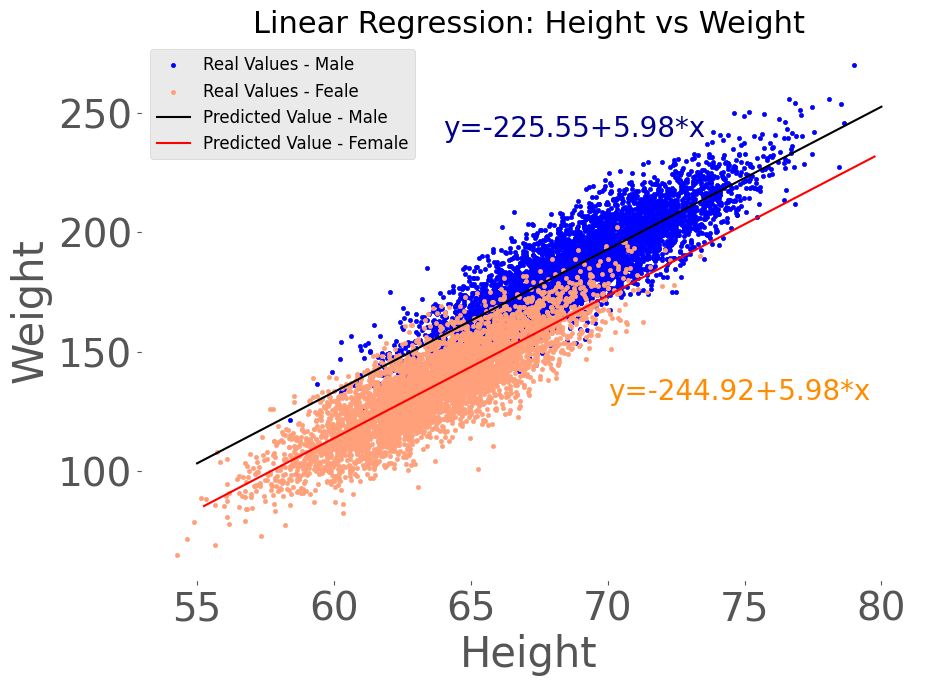

In [27]:
# Plot of our final results
fig = plt.figure(figsize = (10, 7))

plt.title("Linear Regression: Height vs Weight", fontsize=22)
plt.scatter(x_male, y_male, marker='.', label="Real Values - Male", color="blue")
plt.scatter(x_female, y_female, marker='.', label="Real Values - Feale", color="lightsalmon")

plt.plot(x_dummy_male, y_predicted_male, color = "k", label="Predicted Value - Male")
plt.plot(x_dummy_female, y_predicted_female, color = "r", label="Predicted Value - Female")

# regression equations
plt.text(64, 240, 'y={:.2f}+{:.2f}*x'.format(lr.intercept_, lr.coef_[0]), color='darkblue', size=20)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(lr.intercept_ + lr.coef_[1], lr.coef_[0]), color='darkorange', size=20)

plt.xlabel("Height",fontsize=30)
plt.ylabel("Weight",fontsize=30)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.legend(fontsize=12)
plt.show()